In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [13]:
data_train = pd.read_csv("/Users/wbm/Documents/Dicoding ML/Time-Series/data_temp.csv")
data_train.head()

,key,time,Temperature
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


In [14]:
data_train = data_train[["time", "Temperature"]]
data_train.head()

,time,Temperature
0,2019-05-03 11:16:18,1571.0
1,2019-05-03 11:25:53,1604.0
2,2019-05-03 11:29:11,1618.0
3,2019-05-03 11:30:01,1601.0
4,2019-05-03 11:30:39,1613.0


In [15]:
# check whether there are null value
data_train.isnull().sum()

time              0
Temperature    2901
dtype: int64

In [16]:
# Drop the missing value
data_train = data_train.dropna()
data_train.count()

time           13006
Temperature    13006
dtype: int64

Text(0.5, 1.0, 'Furnace Temperature')

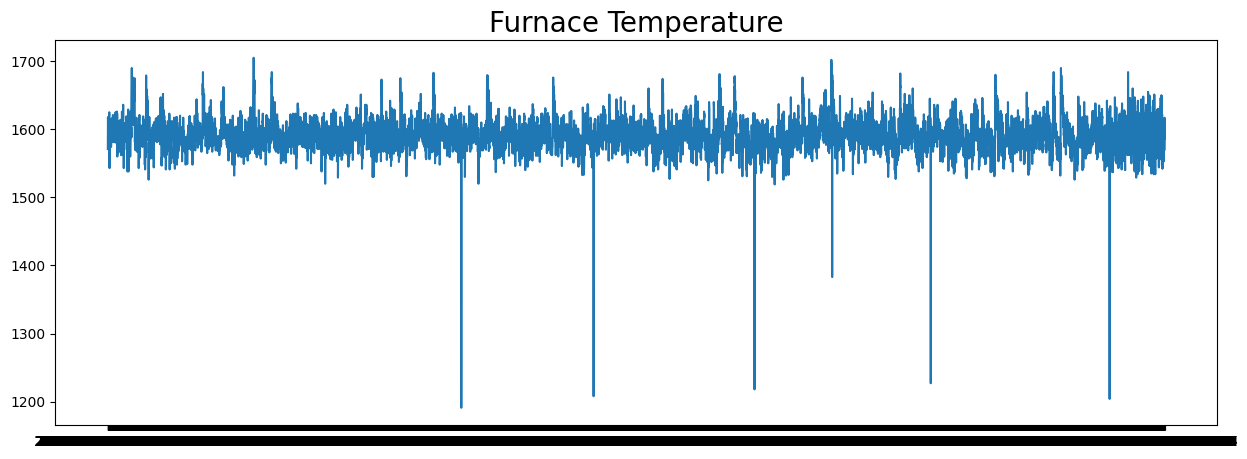

In [17]:
# Plot the dataset
time = data_train['time'].values
temperature = data_train['Temperature'].values

plt.figure(figsize=(15,5))
plt.plot(time, temperature)
plt.title('Furnace Temperature', fontsize = 20)


In [18]:
# Function for converting our input data to the format that can be ingest by the model.
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)  # Corrected 'drop_remainder'
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)



In [19]:
# Calculate 10% of the temperature scale for MAE target
temperature_range = temperature.max() - temperature.min()
mae_target = 0.1 * temperature_range
print(f"MAE target: {mae_target}")

MAE target: 51.400000000000006


In [20]:
# Split the data into training and validation dataset
time_train, time_valid, temp_train, temp_valid = train_test_split(time, temperature, test_size=0.2, random_state=42)

In [21]:
# Create windowed dataset for training
train_set = windowed_dataset(temp_train, window_size= 60, batch_size=100, shuffle_buffer=1000)

# Create windowed dataset for validation
valid_set = windowed_dataset(temp_valid, window_size= 60, batch_size=100, shuffle_buffer=1000)

In [22]:
# Model Training

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(60, return_sequences= True),
    tf.keras.layers.LSTM(60),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1),
])

In [23]:
# Setting Optimizer

optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)

# Compiling the model
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Fit the model on the training set and validate on the validation set
history = model.fit(train_set,epochs=100, validation_data=valid_set)

Epoch 1/100
104/104 [==============================] - 12s 85ms/step - loss: 1589.9169 - mae: 1590.4169 - val_loss: 1588.8799 - val_mae: 1589.3799
Epoch 2/100
104/104 [==============================] - 9s 81ms/step - loss: 1585.3831 - mae: 1585.8831 - val_loss: 1579.2697 - val_mae: 1579.7697
Epoch 3/100
104/104 [==============================] - 9s 81ms/step - loss: 1524.3132 - mae: 1524.8132 - val_loss: 1283.6300 - val_mae: 1284.1300
Epoch 4/100
104/104 [==============================] - 8s 76ms/step - loss: 250.7930 - mae: 251.2901 - val_loss: 13.9179 - val_mae: 14.4024
Epoch 5/100
104/104 [==============================] - 8s 71ms/step - loss: 14.8106 - mae: 15.3021 - val_loss: 14.0864 - val_mae: 14.5749
Epoch 6/100
104/104 [==============================] - 8s 71ms/step - loss: 14.7332 - mae: 15.2243 - val_loss: 15.3965 - val_mae: 15.8907
Epoch 7/100
104/104 [==============================] - 8s 71ms/step - loss: 14.5592 - mae: 15.0498 - val_loss: 14.1178 - val_mae: 14.6051
Epoch 8

Epoch 60/100
104/104 [==============================] - 7s 70ms/step - loss: 14.4250 - mae: 14.9156 - val_loss: 15.4649 - val_mae: 15.9574
Epoch 61/100
104/104 [==============================] - 7s 69ms/step - loss: 14.5763 - mae: 15.0679 - val_loss: 13.8300 - val_mae: 14.3225
Epoch 62/100
104/104 [==============================] - 7s 69ms/step - loss: 14.8266 - mae: 15.3185 - val_loss: 15.3891 - val_mae: 15.8831
Epoch 63/100
104/104 [==============================] - 8s 75ms/step - loss: 14.5294 - mae: 15.0208 - val_loss: 14.1864 - val_mae: 14.6792
Epoch 64/100
104/104 [==============================] - 7s 70ms/step - loss: 14.4510 - mae: 14.9422 - val_loss: 13.7032 - val_mae: 14.1925
Epoch 65/100
104/104 [==============================] - 7s 70ms/step - loss: 14.3570 - mae: 14.8477 - val_loss: 14.8284 - val_mae: 15.3222
Epoch 66/100
104/104 [==============================] - 7s 69ms/step - loss: 14.4773 - mae: 14.9685 - val_loss: 16.4197 - val_mae: 16.9147
Epoch 67/100
104/104 [=====